# Intro to GIS with Python
## What is GIS?
GIS stands for _geographic information system_. Colloquially, it's the process of presenting and analyzing data on maps. GIS allows us to visualize and characterize the nature of spatially distributed data, including weather, infrastructure, and populations. As you can imagine, this is key for disaster response scenarios for both diagnosing the situation, as well as planning and monitoring the response.

There are dozens of different GIS software options, both free and commercial. In this course, we will focus on free, python-based tools and packages. The principles taught in this course should carry over to most common GIS implementations. 

In particular, we will be using:
- GDAL
- geopandas

This content is based off of the [Automating GIS Processes course](https://automating-gis-processes.github.io/2018/) from the University of Helsinki

In [ ]:
try: # try the following block of code
  import geopandas as gpd
except: # if the try block throws an error, run the following
  !pip install geopandas # install geopandas
  import geopandas as gpd
  
try:
  import contextily as ctx # import
except:
  !apt install libproj-dev proj-data proj-bin
  !apt install libgeos-dev
  !pip install cython
  !pip install cartopy
  !pip install contextily==1.0rc1 --no-use-pep517 --no-cache-dir
import contextily as ctx # library for providing background maps
import fiona # library for reading/writing GIS files, comes w/ geopandas
from shapely.geometry import Point, LineString, Polygon
from matplotlib import pyplot as plt

## Reading in GIS data
For this lesson we are using data in Shapefile format representing distributions of specific beautifully colored fish species called Damselfish and the country borders of Europe.

We're going to use the `wget` terminal command to download a file from a url.
We then use `unzip` to unzip the archive into a folder of the same name. The `-o` option is used to overwrite the folder if it already exists
We then us `ls` to see the contents of the folder

In [ ]:
!wget https://github.com/AutoGIS/data/raw/master/L2_data.zip -O fish_data.zip
!unzip -o fish_data.zip 
!ls L2_data

--2019-07-12 09:30:58--  https://github.com/AutoGIS/data/raw/master/L2_data.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AutoGIS/data/master/L2_data.zip [following]
--2019-07-12 09:30:58--  https://raw.githubusercontent.com/AutoGIS/data/master/L2_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14380209 (14M) [application/zip]
Saving to: ‘fish_data.zip’

fish_data.zip       100%[===================>]  13.71M  58.9MB/s    in 0.2s    

2019-07-12 09:30:58 (58.9 MB/s) - ‘fish_data.zip’ saved [14380209/14380209]

Archive:  fish_data.zip
 extracting: L2_data/DAMSELFISH_distributions.cpg  
 

Typically reading the data into Python is the first step of the analysis pipeline. In GIS, there exists various dataformats such as [Shapefile](https://en.wikipedia.org/wiki/Shapefile), [GeoJSON](https://en.wikipedia.org/wiki/GeoJSON), [KML](https://en.wikipedia.org/wiki/Keyhole_Markup_Language), and [GPKG](https://en.wikipedia.org/wiki/GeoPackage) that are probably the most common vector data formats. Geopandas is capable of reading data from all of these formats (plus many more). Reading spatial data can be done easily with geopandas using `gpd.from_file()` -function:

In [ ]:
# path to shapefile
filepath = "L2_data/DAMSELFISH_distributions.shp"

# Read file using gpd.read_file()
data = gpd.read_file(filepath)

In [ ]:
data.head() #look at top entries - looks like a pandas dataframe

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,SUBPOP,LEGEND,SEASONAL,TAX_COMM,RL_UPDATE,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry
0,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,None,Extant (resident),1,None,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,POLYGON ((-115.6437454219999 29.71392059300007...
1,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,None,Extant (resident),1,None,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-105.589950704 21.89339825500002, -1..."
2,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,None,Extant (resident),1,None,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-111.159618439 19.01535626700007, -1..."
3,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,None,Extant (resident),1,None,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,POLYGON ((-80.86500229899997 -0.77894492099994...
4,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,None,Extant (resident),1,None,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,POLYGON ((-67.33922225599997 -55.6761029239999...


In [ ]:
# Note the column 'geometry' is full of shapely Polygon objects
type(data['geometry'].iloc[0])

shapely.geometry.polygon.Polygon

In [ ]:
# geopandas adds useful attributes to the geodataframe, such as the ability to get bounds
# of all the geometry data
data.bounds

,minx,miny,maxx,maxy
0,-116.222084,21.890988,-108.497261,29.767482
1,-107.594206,18.358633,-103.606827,22.256010
2,-112.956729,18.045856,-111.159482,19.956861
3,-82.225059,-57.388035,-67.241505,-0.692622
4,-67.356079,-55.719820,-67.318440,-55.663008
5,-74.818222,-51.460823,-74.818222,-51.460823
6,-87.992966,4.591272,-86.129128,6.466334
7,-82.514526,3.052951,-80.680229,4.899386
8,-91.390114,-2.109253,-89.535355,-0.241530
9,-84.250052,8.266622,-83.337659,9.338344


In [ ]:
# similary, we can get attributes such as boundary
data.boundary

0      (LINESTRING (-115.6437454219999 29.71392059300...
1      (LINESTRING (-105.589950704 21.89339825500002,...
2      (LINESTRING (-111.159618439 19.01535626700007,...
3      (LINESTRING (-80.86500229899997 -0.77894492099...
4      LINESTRING (-67.33922225599997 -55.67610292399...
5      LINESTRING (-74.81822204599996 -51.46082305899...
6      (LINESTRING (-86.13105102199995 5.598867493000...
7      (LINESTRING (-80.68215272899994 4.037426486000...
8      (LINESTRING (-90.22271068899994 -0.27334342499...
9      (LINESTRING (-83.93571481699996 9.296388679000...
10     (LINESTRING (-79.15961456299993 9.011326790000...
11     LINESTRING (-91.09391784599995 -0.580960689999...
12     LINESTRING (-78.46049499599997 8.4390516280000...
13     LINESTRING (-91.24864959699994 -0.679847478999...
14     (LINESTRING (-114.129066467 31.49156189000007,...
15     (LINESTRING (-106.7327677389999 23.60688894500...
16     (LINESTRING (-111.159618439 19.01535626700007,...
17     (LINESTRING (-121.799003

In [ ]:
# area
data.area

0      1.939625e+01
1      6.145902e+00
2      2.697207e+00
3      8.746062e+01
4      9.183696e-04
5      2.989001e-15
6      2.732157e+00
7      2.654657e+00
8      2.381573e+00
9      5.363015e-01
10     3.396193e-01
11     1.165597e-02
12     1.912753e-04
13     4.885182e-07
14     2.734773e+01
15     1.047928e+01
16     2.697207e+00
17     1.074924e+01
18     8.724611e+01
19     9.183696e-04
20     2.989001e-15
21     1.132423e+02
22     1.843809e+01
23     1.643766e+01
24     5.287529e-05
25     4.810736e+00
26     2.697207e+00
27     3.867120e+01
28     3.744573e+01
29     1.693946e+01
           ...     
201    5.342023e+00
202    4.213801e+00
203    3.849401e+00
204    3.913388e+01
205    2.588695e+01
206    1.624922e+01
207    2.732157e+00
208    2.697207e+00
209    2.654657e+00
210    2.381573e+00
211    1.165597e-02
212    4.885182e-07
213    3.483583e+01
214    1.700187e+01
215    5.981361e+00
216    2.732157e+00
217    2.659590e+00
218    2.654657e+00
219    2.381573e+00


In [ ]:
# we can check which species can be found between latitudes 10 and 20 degrees north
data.intersects(Polygon([(-180,10),(180,10),(180,20),(-180,20)]))

0      False
1       True
2       True
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15      True
16      True
17     False
18     False
19     False
20     False
21      True
22     False
23     False
24      True
25     False
26      True
27     False
28      True
29     False
       ...  
201    False
202    False
203    False
204     True
205    False
206     True
207    False
208     True
209    False
210    False
211    False
212    False
213     True
214     True
215    False
216    False
217     True
218    False
219    False
220    False
221    False
222    False
223    False
224    False
225    False
226    False
227    False
228    False
229     True
230    False
Length: 231, dtype: bool

## Exercises
Using the polygon objects in the `geometry` column of the data frame:
- create a new column called `area` which represent the areas of each row in the shapefile
- What are the max, min, median, and quartiles values of the areas?
- What fraction of the areas are greater than 25 square degrees?
- What species has the largest total area?

## Plotting
Geopandas provides a useful `.plot()`  function which creates a matplotlib figure and returns an axes object.

There's a ton of additional libraries that provide more plotting functionality, and we'll explore a few of them here. There's no "correct" set of libraries to use for GIS in python, and it's up to you to figure out which ones fit the best into your workflow.

The `cmap` option to the `.plot()` function allows you to pass in a [matplotlib colormap name](https://matplotlib.org/gallery/color/colormap_reference.html), which are collections of colors used to visualize data

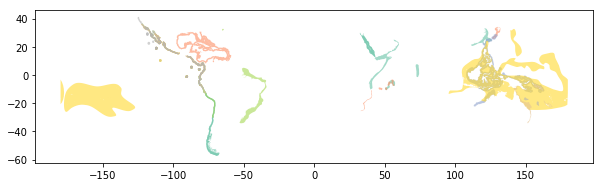

In [ ]:
# we can use the built-in geopandas plot function to visualize
ax = data.plot(figsize=(10,5), alpha=0.6, cmap='Set2')

currently the colors are assigned arbitrarily. However, we can also use colors to encode information. 

Let's first use colors to categorize by endangerment status. To do so, we pass the `column` argument to `plot()`. For reference, we also set `legend=True`

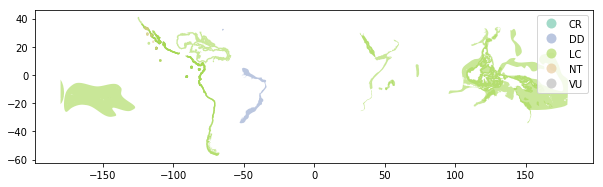

In [ ]:
ax = data.plot(figsize=(10,5), alpha=0.6, cmap='Set2', column='CATEGORY', legend=True)

Another common use of colors to encode data is to represent numerical data in an area with colors. This is known as a [choropleth](https://en.wikipedia.org/wiki/Choropleth_map).

Let's use this to encode the areas of each region

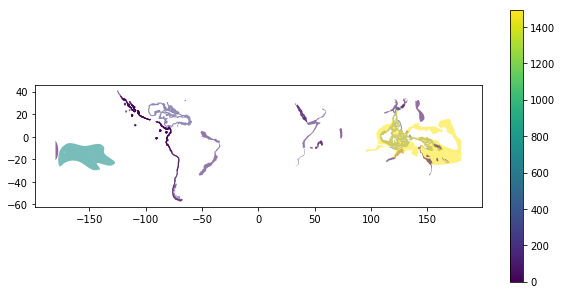

In [ ]:
#first create a column of areas
data['area'] = data.area

#then pass the area column as an argument
ax = data.plot(figsize=(10,5), alpha=0.6, column='area', legend=True)

The colorbar legend is too big relative to the figure. We'll have to do some manual adjustments. There are tools to create axes grids for colorbars available in:
https://matplotlib.org/3.1.0/tutorials/toolkits/axes_grid.html

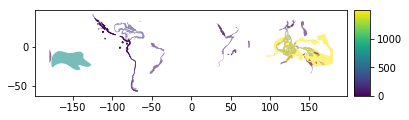

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax) #makes it so you can append to the axes

#put another axes to the right of it, at 5% of the total width with 0.1 points of padding in between
cax = divider.append_axes("right", size="5%", pad=0.1) 
# note that you have to specify both ax and cax as arguments for it to work
data.plot(figsize=(10,5), alpha=0.6, column='area', 
          legend=True, ax=ax, cax=cax)

The data by itself looks just like a bunch of blobs. Let's put it on a map for context

GeoDataFrame has an attribute called `.crs` that shows the coordinate system of the data which is empty (None) in our case since we are creating the data from the scratch. 

We will not go into depth about projections, which are a deep topic in and of themselves. For reference, see [this lecture](https://automating-gis-processes.github.io/2018/notebooks/L2/projections.html) from the University of Helsinki Automating GIS Processes course. In short, there are many ways to flatten the globe, each with its own benefits and issues. 

Two of the common ones we'll be using are [Web Mercator](https://en.wikipedia.org/wiki/Web_Mercator_projection), which is common in web applications, and [WGS84](https://en.wikipedia.org/wiki/World_Geodetic_System), which is the reference coordinate system used by GPS. Each has a EPSG (European Petroleum Survey Group) code associated with it. Web Mercator is EPSG 3857, and WGS84 is 4326.

[Contextily](https://github.com/darribas/contextily) is a library for creating basemaps. It pulls the data from [OpenStreetMap](https://www.openstreetmap.org), a free and excellent wiki google-maps-style service.


In [ ]:
# the data is currently in WGS84
data.crs

{'init': 'epsg:4326'}

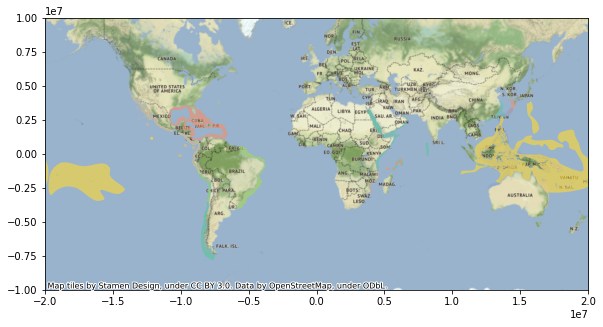

In [ ]:
ax = data.to_crs(epsg=3857).plot(figsize=(10,5), alpha=0.6, cmap='Set2')
# now we add a basemap. ctx finds a basemap for a background from
# an online repository
ctx.add_basemap(ax)

We can use different background styles:
![tile styles](https://raw.githubusercontent.com/darribas/contextily/master/tiles.png).

Note that some styles only contain labels or lines.

In [ ]:
sources = [i for i in dir(ctx.tile_providers) if i[0]!='_']
sources

['OSM_A',
 'OSM_B',
 'OSM_C',
 'ST_TERRAIN',
 'ST_TERRAIN_BACKGROUND',
 'ST_TERRAIN_LABELS',
 'ST_TERRAIN_LINES',
 'ST_TONER',
 'ST_TONER_BACKGROUND',
 'ST_TONER_HYBRID',
 'ST_TONER_LABELS',
 'ST_TONER_LINES',
 'ST_TONER_LITE',
 'ST_WATERCOLOR']

In [ ]:
# we can get the urls for the different backgrounds using:
getattr(ctx.sources,'ST_TONER_BACKGROUND')
# we'll pass this into the add_basemap function in the url argument

'http://tile.stamen.com/toner-background/tileZ/tileX/tileY.png'

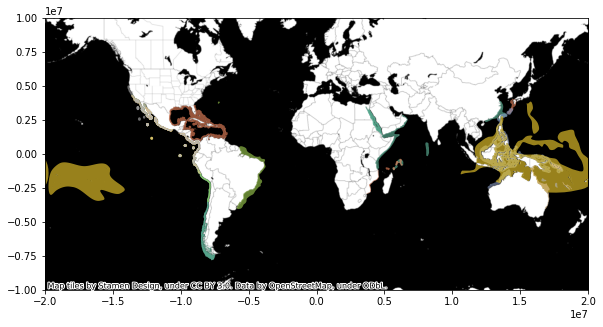

In [ ]:
ax = data.to_crs(epsg=3857).plot(figsize=(10,5), alpha=0.6, cmap='Set2')
ctx.add_basemap(ax, url=getattr(ctx.sources,'ST_TONER_BACKGROUND'))

In [ ]:
# we can download background tiles as images for quicker loading (don't need to keep redownloading)
# let's use the bounds of one of the fish locations as an example
w,s,e,n = data.loc[25,'geometry'].bounds
data.loc[10,'geometry'].bounds

(-79.56737515199995, 8.442261236000036, -78.48675787199994, 9.030436516000066)

the function bounds2img takes coordinates and [zoom level](https://wiki.openstreetmap.org/wiki/Zoom_levels) and downloads the corresponding tiles of the map as images

[(2498442.0929655433, 2884399.3464440173),
 (-12544723.739110544, -12090944.453255981)]

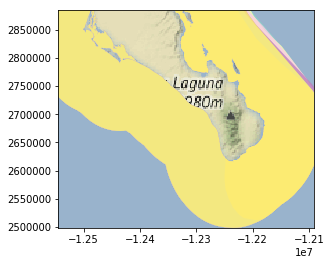

In [ ]:
img, ext = ctx.bounds2img(w, s, e, n, 6, ll=True) #ll means coordinates are in lat-lon
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.imshow(img, extent=ext)
data.to_crs(epsg=3857).plot(ax=ax, cmap='Set3', alpha=0.8)
ax_bounds = data.to_crs(epsg=3857).loc[25,'geometry'].bounds
ax.set(xlim=[ax_bounds[0],ax_bounds[2]],ylim=[ax_bounds[1],ax_bounds[3]])


## Writing to a shapefile

First we'll make a directory for outputting data to. We use the `mkdir` command which makes an empty folder. The `-p` option will skip it if the directory already exists

In [ ]:
!mkdir output_data -p

In [ ]:
# let's write the first 50 rows of the shapefile to a new file
outfp = "output_data/DAMSELFISH_distributions_SELECTION.shp"

# Select first 50 rows
selection = data[0:50]

# Write those rows into a new Shapefile (the default output file format is Shapefile)
selection.to_file(outfp)

## Converting shapes to GeoDataFrames
You can use Shapely geometric objects to create a GeoDataFrame from scratch. 

In [ ]:
# Create an empty geopandas GeoDataFrame
newdata = gpd.GeoDataFrame()

# add a geometry column (necessary for shapefile)
newdata['geometry'] = None

# Let's see what we have at the moment
print(newdata)

Empty GeoDataFrame
Columns: [geometry]
Index: []


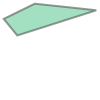

In [ ]:
# Coordinates of the MIT main campus in Decimal Degrees
coordinates = [(-71.092562, 42.357602), ( -71.080155, 42.361553), ( -71.089817, 42.362584), (-71.094688, 42.360198)]

# Create a Shapely polygon from the coordinate-tuple list
poly = Polygon(coordinates)

# Let's see what we have
poly

Quick checkpoint! Find the coordinates of the corners of a place that has significant meaning to you. Just like we did above, make a Shapely polygon from the coordinate-tuple list of the corners of your personal landmark.
Display it! It can be as big as you want. If you want, share out with the class the place and why it is significant to you.  

In [ ]:
# Insert the polygon into 'geometry' -column at index 0
newdata.loc[0, 'geometry'] = poly
newdata

,geometry
0,"POLYGON ((-71.092562 42.357602, -71.080155 42...."


In [ ]:
newdata.loc[0, 'location'] = 'MIT main campus'
newdata

,geometry,location
0,"POLYGON ((-71.092562 42.357602, -71.080155 42....",MIT main campus


Before exporting the data it is necessary to set the coordinate reference system (projection) for the GeoDataFrame. 

We will set the crs using a function from `fiona`, another GIS library integrated with geopandas. 

In [ ]:
from fiona.crs import from_epsg

# Set the GeoDataFrame's coordinate system to WGS84 (i.e. epsg code 4326)
newdata.crs = from_epsg(4326)

# Let's see how the crs definition looks like
print(newdata.crs)

{'init': 'epsg:4326', 'no_defs': True}


In [ ]:
outfp = "output_data/MIT_campus.shp"

# Write the data into that Shapefile
newdata.to_file(outfp)

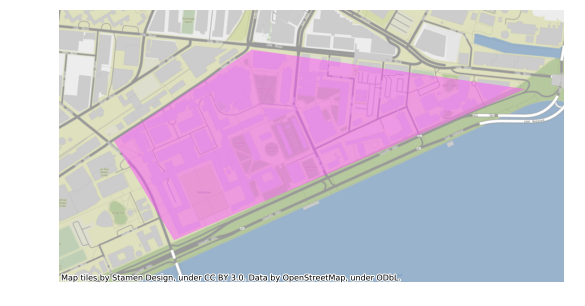

In [ ]:
# Let's plot it
ax = newdata.to_crs(epsg=3857).plot(figsize=(10,5),alpha = 0.5, color='#FF55FF')
ctx.add_basemap(ax)
ax.set_axis_off() # remove the x-y axes

# Exercise
Find an interesting GIS dataset and:
- visualize some raw data
- ask an interesting analysis question about it:
  - intersections, sizes, quantities
  - relationships
  - e.g. which latitudes contain the most endangered species? what countries have the most ports per km of coastline?
- Visualize some of your analysis

As per usual, we'll ask a few volunteers to present their results.

Here are some resources to look for GIS datasets:
- Cambridge, MA GIS data: http://cambridgegis.github.io/gisdata.html
- Free GIS data: https://freegisdata.rtwilson.com/
- Data.gov: https://www.data.gov/

An important part responsibility of GIS engineers during the pandemic is to visualize spread and case intensity during the pandemic. Using datasets from the following sources:


*   Visualize raw data collected from sources around the world about the state of the pandemic
*   Explore connections between various factors and come up with a hypothesis for your research. Some ideas could be connecting COVID data in different counties to socioeconomy, age, or building architecture data. Remember, mapping data speaks louder than graphs or datasets.
*   Present your findings to the rest of the class and come up with a possible solution to the problem or connection that you explored

COVID-19 Datasets:
* COVID-19 Dataset (Kaggle): www.kaggle.com/imdevskp/corona-virus-report
* New York Times Dataset: https://github.com/nytimes/covid-19-data
* JHU Dataset: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data
*  Feel free to explore more area specific datasets or datasets which outline other conditions. These are just suggestions.

To make your research connections, be sure to explore population and demographic datasets of different counties around the country. Be creative with your research!

Map a shape of your hometown onto the map. Similar to how we mapped the coordinates of the MIT campus on a map, map the coordinates of your hometown onto a map. It doesn't have to exact, but just take a couple rough coordinates and visualize your place on the map. The TAs will try to map these shapes onto a full map so that we can get an idea of where everyone is from and visualize how geographically diverse our class is.